# Set up

In [1]:
# Set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


In [2]:
# Load data
data = pd.read_excel("Boston_Housing.xlsx")

# Data Exploration

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

## Attributes
CRIM - per capita crime rate by town  
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.  
INDUS - proportion of non-retail business acres per town.  
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)  
NOX - nitric oxides concentration (parts per 10 million)  
RM - average number of rooms per dwelling  
AGE - proportion of owner-occupied units built prior to 1940  
DIS - weighted distances to five Boston employment centres  
RAD - index of accessibility to radial highways  
TAX - full-value property-tax rate per $10,000  
PTRATIO - pupil-teacher ratio by town  
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
LSTAT - % lower status of the population  
MEDV - Median value of owner-occupied homes in $1000's

In [5]:
# Check missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Check value ranges
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Split up predictors and target
y = data['MEDV']
X = data.drop(columns=['MEDV'])


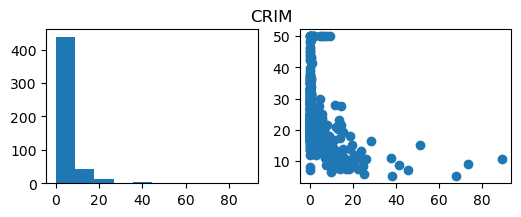

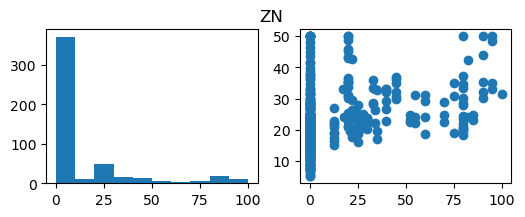

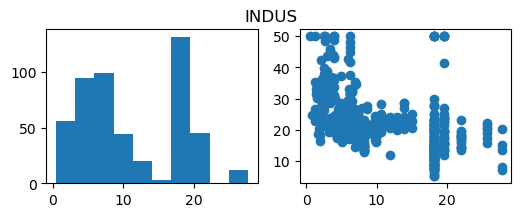

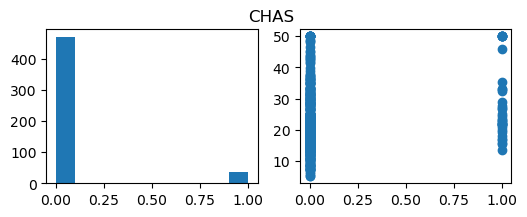

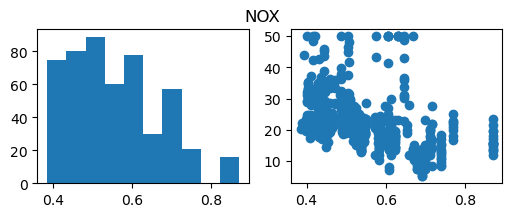

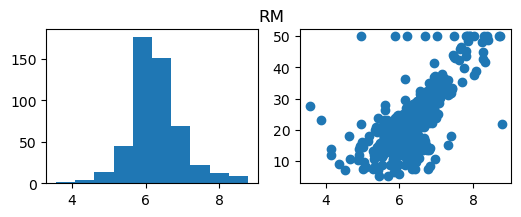

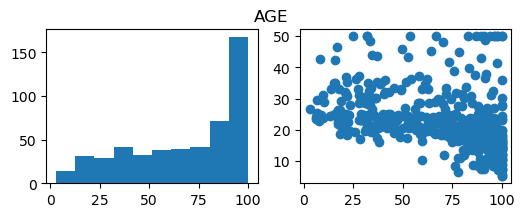

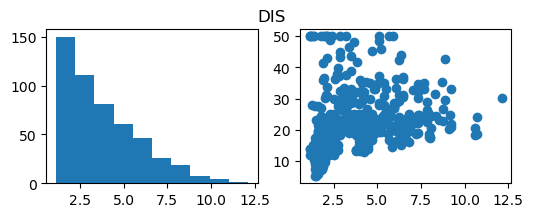

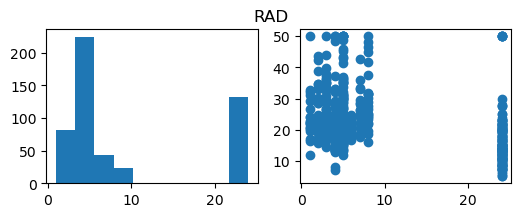

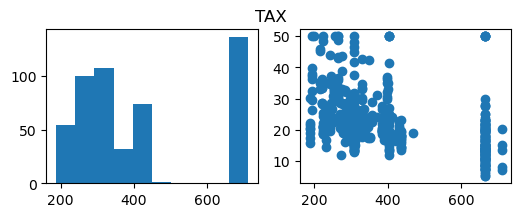

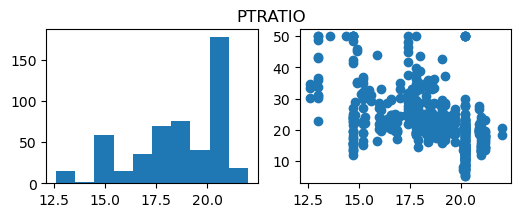

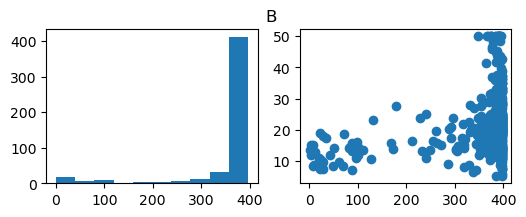

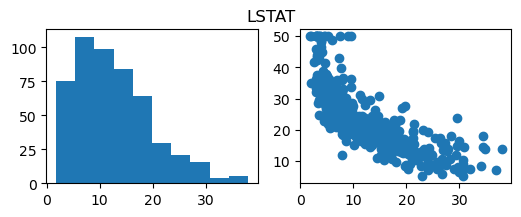

In [8]:
# Distribution of predictors and relationship with target
for col in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(6,2))
    ax[0].hist(X[col])
    ax[1].scatter(X[col], y)
    fig.suptitle(col)
    plt.show()


# Linear Regression

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
def compute_cost(X, y, w, b): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))
    
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [12]:
w_init = np.full((X_train.shape[1],), 0.01)
b_init = 0

# test cost calculation
cost = compute_cost(X_train, y_train, w_init, b_init)
print(cost)

142.54084329732373


In [13]:
w_init.shape

(13,)

In [14]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    err = (np.dot(X, w) + b) - y
    dj_dw = np.dot(X.T, err)    # dimension: (n,m)*(m,1)=(n,1)
    dj_db = np.sum(err)
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

In [15]:
# test calculate gradients
dj_db, dj_dw = compute_gradient(X_train, y_train, w_init, b_init)

print(dj_db, dj_dw)

-13.529578059653465 [-7.37100321e+00 -2.59352780e+02 -1.08515058e+02 -1.35762290e+00
 -6.90637233e+00 -9.00985142e+01 -8.00951767e+02 -5.82148602e+01
 -8.10876869e+01 -4.37328680e+03 -2.36782873e+02 -5.14421631e+03
 -1.15002083e+02]


In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(X, y, w, b)
        J_history.append(cost)
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

In [17]:
iterations = 1000
alpha = 1.0e-6

w_out, b_out, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost   103.13
Iteration  100: Cost    38.65
Iteration  200: Cost    37.94
Iteration  300: Cost    37.53
Iteration  400: Cost    37.16
Iteration  500: Cost    36.82
Iteration  600: Cost    36.52
Iteration  700: Cost    36.25
Iteration  800: Cost    35.99
Iteration  900: Cost    35.76


In [18]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"MSE = {J_hist[-1]}")

Training result: w = [-0.00133705  0.06339556  0.00156806  0.01035631  0.01022049  0.0182441
  0.00624463  0.01367524  0.00820667 -0.00312176  0.01488947  0.06046097
 -0.01255582], b = 0.0007186912933546358
MSE = 35.54828794215212


In [19]:
def plot_cost(data, cost_type):
    plt.figure(figsize=(4,2))
    plt.plot(data)
    plt.xlabel("Iteration Step")
    plt.ylabel(cost_type)
    plt.title("Cost vs. Iteration")
    plt.show()    

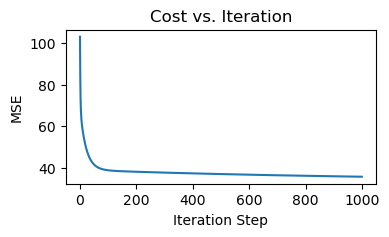

In [20]:
plot_cost(J_hist, "MSE")

In [21]:
def predict(X, w, b):
    p = np.dot(X, w) + b
    return p

In [22]:
def plot_pred_actual(y_actual, y_pred):
    x_ul = int(math.ceil(max(y_actual.max(), y_pred.max()) / 10.0)) * 10
    y_ul = x_ul

    plt.figure(figsize=(4,4))
    plt.scatter(y_actual, y_pred)
    plt.xlim(0, x_ul)
    plt.ylim(0, y_ul)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Predicted vs Actual values")
    plt.show()

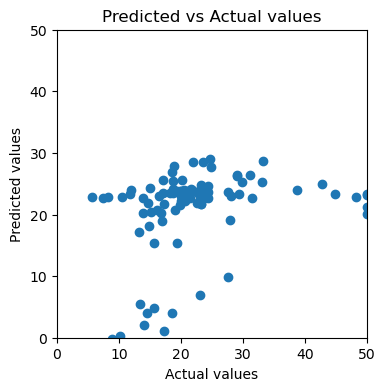

In [23]:
y_pred = predict(X_test, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [62]:
def compute_mse(y1, y2):
    return np.mean(np.power((y1 - y2),2))

In [24]:
mse = compute_mse(y_test, y_pred)
print(mse)

92.17452333685534


In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

92.17452333685534


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
standard_scaler = StandardScaler()
X_train_norm = standard_scaler.fit_transform(X_train)
X_test_norm = standard_scaler.transform(X_test)

In [28]:
print(X_train_norm.min(axis=0))
print(X_train_norm.max(axis=0))

[-0.41585389 -0.49960763 -1.52676181 -0.27288841 -1.48521471 -3.95023393
 -2.35561695 -1.24929432 -0.97145156 -1.26486864 -2.67431562 -4.0480036
 -1.50565168]
[10.5304256   3.73631017  2.37911283  3.66450153  2.73874661  3.57176447
  1.10332748  4.0212862   1.68737845  1.80582587  1.61380336  0.43041207
  3.32974483]


In [29]:
iterations = 1000
alpha = 1.0e-2

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost   290.77
Iteration  100: Cost    45.31
Iteration  200: Cost    14.97
Iteration  300: Cost    10.80
Iteration  400: Cost    10.14
Iteration  500: Cost     9.98
Iteration  600: Cost     9.91
Iteration  700: Cost     9.86
Iteration  800: Cost     9.82
Iteration  900: Cost     9.79


In [30]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.85695917  0.81694167 -0.33251386  0.65407765 -1.34891255  2.79006358
 -0.21880269 -2.51268512  1.0642907  -0.87340699 -2.19907916  0.73705692
 -3.47069999], b = 22.61090500500162
Training MSE = 9.770527655777663


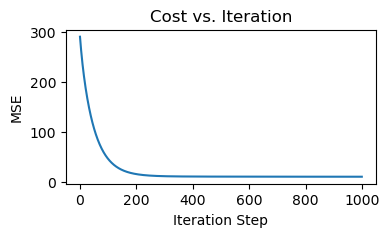

In [31]:
plot_cost(J_hist, "MSE")

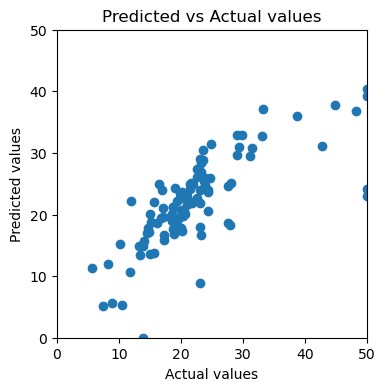

In [32]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [33]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 34.688570642256394


## Regularization

In [34]:
def compute_cost_ridge(X, y, w, b, lambda_ = 1): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))    

    reg_cost = np.sum(np.power(w, 2))

    total_cost = 1 / (2 * m) * cost + (lambda_ / (2 * m)) * reg_cost

    return total_cost

In [35]:
cost = compute_cost_ridge(X_train, y_train, w_init, b_init, lambda_=0.7)
print(cost)

142.54084442356137


In [36]:
def compute_gradient_ridge(X, y, w, b, lambda_):
    m = X.shape[0]

    err = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, err) / m + (lambda_ / m) * w
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [37]:
dj_db, dj_dw =  compute_gradient_ridge(X_train, y_train, w_init, b_init, lambda_=0.7)
print(dj_db, dj_dw)

-13.529578059653465 [-7.37098589e+00 -2.59352763e+02 -1.08515040e+02 -1.35760557e+00
 -6.90635500e+00 -9.00984968e+01 -8.00951750e+02 -5.82148429e+01
 -8.10876696e+01 -4.37328679e+03 -2.36782856e+02 -5.14421630e+03
 -1.15002066e+02]


In [38]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_=0.7, num_iters=1000):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)
        
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

In [39]:
iterations = 1000
alpha = 1.0e-2
lambda_ = 1

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost_ridge, compute_gradient_ridge, alpha, lambda_, iterations)

Iteration    0: Cost   290.77
Iteration  100: Cost    45.34
Iteration  200: Cost    15.01
Iteration  300: Cost    10.84
Iteration  400: Cost    10.18
Iteration  500: Cost    10.02
Iteration  600: Cost     9.95
Iteration  700: Cost     9.90
Iteration  800: Cost     9.87
Iteration  900: Cost     9.84


In [40]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.85446716  0.81268419 -0.33534712  0.65471287 -1.33634709  2.79071006
 -0.21965666 -2.49407599  1.0508165  -0.8675433  -2.19421475  0.73691838
 -3.45966069], b = 22.61090500500162
Training MSE = 9.820229856207566


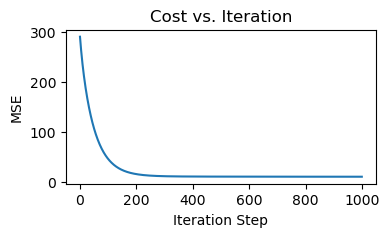

In [41]:
plot_cost(J_hist, "MSE")

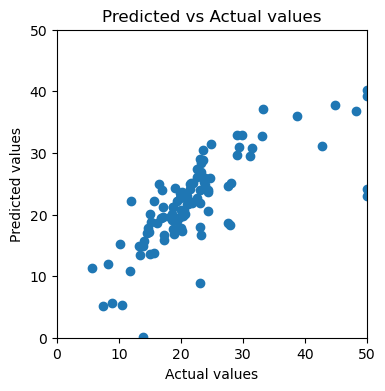

In [42]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [43]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 34.734370095654874


In [44]:
def compute_cost_lasso(X, y, w, b, lambda_ = 0.7): 
    m = X.shape[0] 
    
    f_wb = np.dot(X, w) + b
    cost = np.sum(np.power(f_wb - y, 2))    

    reg_cost = np.sum(np.abs(w))

    total_cost = 1 / (2 * m) * cost + (lambda_ / (2 * m)) * reg_cost

    return total_cost

In [45]:
cost = compute_cost_lasso(X_train, y_train, w_init, b_init, lambda_=0.7)
print(cost)

142.5409559210861


In [46]:
def compute_gradient_lasso(X, y, w, b, lambda_=0.7):
    m = X.shape[0]

    err = np.dot(X, w) + b - y
    dj_dw = np.dot(X.T, err) / m + (lambda_ / m) * np.sign(w)
    dj_db = np.sum(err) / m

    return dj_db, dj_dw

In [47]:
dj_db, dj_dw =  compute_gradient_lasso(X_train, y_train, w_init, b_init, lambda_=0.7)
print(dj_db, dj_dw)

-13.529578059653465 [-7.36927054e+00 -2.59351047e+02 -1.08513325e+02 -1.35589023e+00
 -6.90463965e+00 -9.00967815e+01 -8.00950034e+02 -5.82131275e+01
 -8.10859542e+01 -4.37328507e+03 -2.36781141e+02 -5.14421458e+03
 -1.15000350e+02]


In [48]:
iterations = 1000
alpha = 1.0e-2
lambda_ = 1

w_out, b_out, J_hist = gradient_descent(X_train_norm, y_train, w_init, b_init, compute_cost_lasso, compute_gradient_lasso, alpha, lambda_, iterations)

Iteration    0: Cost   290.77
Iteration  100: Cost    45.33
Iteration  200: Cost    14.99
Iteration  300: Cost    10.82
Iteration  400: Cost    10.16
Iteration  500: Cost    10.01
Iteration  600: Cost     9.93
Iteration  700: Cost     9.88
Iteration  800: Cost     9.85
Iteration  900: Cost     9.82


In [49]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.85140381  0.81158048 -0.33054899  0.6528549  -1.34151951  2.79160543
 -0.21393583 -2.49716063  1.04640841 -0.86252501 -2.19706126  0.73442595
 -3.47202131], b = 22.61090500500162
Training MSE = 9.796159469912835


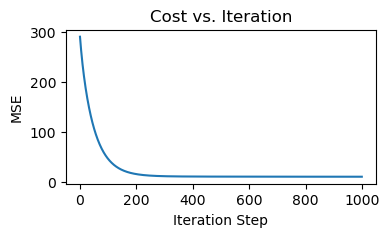

In [50]:
plot_cost(J_hist, "MSE")

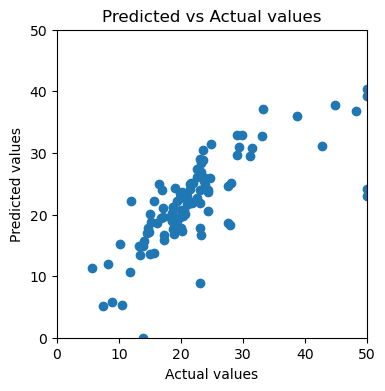

In [51]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [52]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 34.716433403921876


Coordinate Descent for LASSO  
Source: 
- https://xavierbourretsicotte.github.io/lasso_implementation.html
- https://www.kaggle.com/code/ddatad/coordinate-descent-for-lasso-normal-regression

In [53]:
def soft_threshold(rho, lamda_):
    if rho < - lamda_:
        return (rho + lamda_)
    elif rho >  lamda_:
        return (rho - lamda_)
    else: 
        return 0    

In [54]:
def compute_residuals(X, y, w, b):
    return y - (np.dot(X, w) + b)

In [55]:
def compute_rho_j(X, y, w, b, j):
    X_k = np.delete(X, j, axis=1)    # remove the jth element
    w_k = np.delete(w, j)    # remove the jth element

    err = compute_residuals(X_k, y, w_k, b)

    X_j = X[:,j]
    rho_j = np.dot(X_j, err)
    
    return rho_j

In [56]:
def coordinate_descent_lasso(X, y, w_in, b_in, cost_function, lambda_, num_iters=1000, tolerance=1e-4):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    n = X.shape[1]

    for i in range(num_iters):
        # Update weights
        for j in range(n):
            X_j = X[:,j]
            rho_j = compute_rho_j(X, y, w, b, j)
            w[j] = soft_threshold(rho_j, lambda_) / np.sum(X_j ** 2)

        # Update bias
        b = np.mean(y - np.dot(X, w))
        err = compute_residuals(X, y, w, b)

        # Calculate total cost
        cost = cost_function(X, y, w, b, lambda_)
        J_history.append(cost)

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

        # Check convergence
        if np.max(np.abs(err)) < tolerance:
            break

    return w, b, J_history

In [57]:
iterations = 1000
lambda_ = 1e-4
tolerance = 1e-4

w_out, b_out, J_hist = coordinate_descent_lasso(X_train_norm, y_train, w_init, b_init, compute_cost_lasso, lambda_, iterations, tolerance)

Iteration    0: Cost    17.20
Iteration  100: Cost     9.66
Iteration  200: Cost     9.66
Iteration  300: Cost     9.66
Iteration  400: Cost     9.66
Iteration  500: Cost     9.66
Iteration  600: Cost     9.66
Iteration  700: Cost     9.66
Iteration  800: Cost     9.66
Iteration  900: Cost     9.66


In [58]:
print(f"Training result: w = {w_out}, b = {b_out}")
print(f"Training MSE = {J_hist[-1]}")

Training result: w = [-0.97081947  1.05714775  0.03830862  0.5945065  -1.85514591  2.57321962
 -0.08761503 -2.88094112  2.11224095 -1.87532695 -2.29276685  0.71817914
 -3.59245483], b = 22.611881188118804
Training MSE = 9.663237657323776


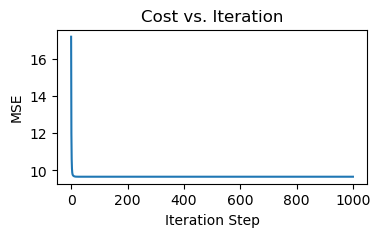

In [59]:
plot_cost(J_hist, "MSE")

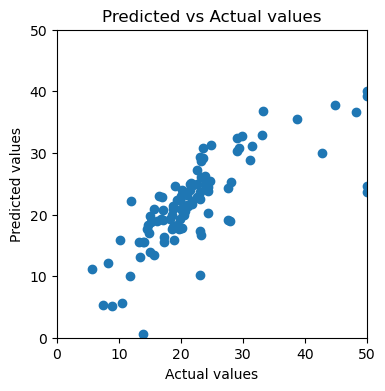

In [60]:
y_pred = predict(X_test_norm, w_out, b_out)

plot_pred_actual(y_test, y_pred)

In [61]:
mse = compute_mse(y_test, y_pred)
print(f"Test MSE = {mse}")

Test MSE = 33.44898384414151


# Regression Tree

Reference: https://medium.com/@beratyildirim/regression-tree-from-scratch-using-python-a74dba2bba5f

In [69]:
def get_best_split(x, y):
    # Get all mid-point values as potential splits
    unique_values = np.unique(x)
    splits = (unique_values[:-1] + unique_values[1:]) / 2 

    # Calculate cost
    err = [compute_mse(y[x <= split], np.mean(y[x <= split])) + compute_mse(y[x > split], np.mean(y[x > split])) for split in splits]
    min_err = np.min(err)

    # The value that minimizes cost is the best split value
    best_split = splits[np.argmin(err)]
    
    return best_split, min_err

In [70]:
def build_tree(X, y, depth=1, max_depth=None):
    # Stopping criteria
    if depth == max_depth or len(np.unique(y)) == 1:
        return np.mean(y)

    # Iterate through all the features to find the best feature to split at each node
    best_feature, best_split, min_err = None, None, float('inf')
    
    for feature in X.columns:
        split, err = get_best_split(X[feature], y)
        
        # Only update when it decreases the error
        if err < min_err:
            best_feature, best_split, min_err = feature, split, err

    # If no feature split decrease the error, return mean of overall dataset
    if min_err == float('inf'):
        return np.mean(y)

    left_idx = X[best_feature] <= best_split
    right_idx = X[best_feature] > best_split

    # Recusively build subtrees
    left_subtree = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right_subtree = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth)

    return (best_feature, best_split, left_subtree, right_subtree)


In [71]:
tree = build_tree(X_train, y_train, max_depth=5)
print(tree)

('INDUS', 1.2149999999999999, 50.0, ('LSTAT', 1.855, 50.0, ('LSTAT', 35.875, ('INDUS', 1.2349999999999999, 35.4, 22.41303258145363), 7.0)))


In [88]:
def print_tree(tree, depth=0, branch_name="Root"):
    # Leaf node
    if isinstance(tree, float): 
        print(f"{'-' * depth}Predicted value: {tree}")
        return

    feature, split, left_subtree, right_subtree = tree
    
    # Recursively print out subtrees
    print(f"{'-' * depth}Depth={depth}, branch={branch_name}, split on feature={feature}, threshold={split}")
    print_tree(left_subtree, depth + 1, "Left (<=threshold)")
    print_tree(right_subtree, depth + 1, "Right (>threshold)")

In [89]:
print_tree(tree, depth=0, branch_name="Root")

Depth=0, branch=Root, split on feature=INDUS, threshold=1.2149999999999999
-Predicted value: 50.0
-Depth=1, branch=Right (>threshold), split on feature=LSTAT, threshold=1.855
--Predicted value: 50.0
--Depth=2, branch=Right (>threshold), split on feature=LSTAT, threshold=35.875
---Depth=3, branch=Left (<=threshold), split on feature=INDUS, threshold=1.2349999999999999
----Predicted value: 35.4
----Depth=4, branch=Right (>threshold), split on feature=LSTAT, threshold=2.225
-----Predicted value: 34.9
-----Predicted value: 22.381658291457285
---Predicted value: 7.0


In [74]:
y_train.mean()

22.611881188118808

In [86]:
def build_tree_print(X, y, depth=0, max_depth=None, branch_name="Root"):
    # Stopping criteria
    if depth == max_depth or len(np.unique(y)) == 1:
        print(f"{'-' * depth}Predicted value: {np.mean(y)}")
        return np.mean(y)

    # Iterate through all the features to find the best feature to split at each node
    best_feature, best_split, min_err = None, None, float('inf')
    
    for feature in X.columns:
        split, err = get_best_split(X[feature], y)
        
        # Only update when it decreases the error
        if err < min_err:
            best_feature, best_split, min_err = feature, split, err

    print(f"{'-' * depth}Depth={depth}, branch={branch_name}, split on feature={best_feature}, threshold={best_split}")    

    # If no feature split decrease the error, return mean of overall dataset
    if min_err == float('inf'):
        return np.mean(y)

    left_idx = (X[best_feature] <= best_split)
    right_idx = (X[best_feature] > best_split)

    # Recusively build subtrees
    left_subtree = build_tree_print(X[left_idx], y[left_idx], depth + 1, max_depth, "Left")
    right_subtree = build_tree_print(X[right_idx], y[right_idx], depth + 1, max_depth, "Right")

    return (best_feature, best_split, left_subtree, right_subtree)


In [87]:
tree = build_tree_print(X_train, y_train, max_depth=5)

Depth=0, branch=Root, split on feature=INDUS, threshold=1.2149999999999999
-Predicted value: 50.0
-Depth=1, branch=Right, split on feature=LSTAT, threshold=1.855
--Predicted value: 50.0
--Depth=2, branch=Right, split on feature=LSTAT, threshold=35.875
---Depth=3, branch=Left, split on feature=INDUS, threshold=1.2349999999999999
----Predicted value: 35.4
----Depth=4, branch=Right, split on feature=LSTAT, threshold=2.225
-----Predicted value: 34.9
-----Predicted value: 22.381658291457285
---Predicted value: 7.0


In [92]:
def predict_sample(sample, tree):
    if isinstance(tree, float):  # If it's a leaf node, return the predicted value
        return tree
    
    feature, split, left_subtree, right_subtree = tree
    if sample[feature] <= split:
        return predict_sample(sample, left_subtree)
    else:
        return predict_sample(sample, right_subtree)

def predict(X, tree):
    predictions = []
    for idx, sample in X.iterrows():
        prediction = predict_sample(sample, tree)
        predictions.append(prediction)
    return np.array(predictions)

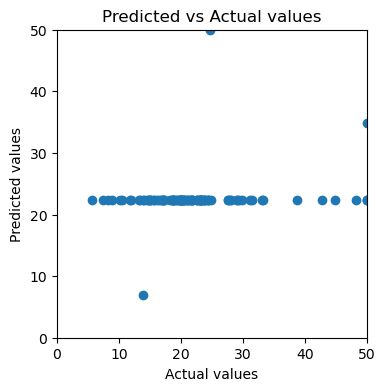

In [93]:
y_pred = predict(X_test, tree)

plot_pred_actual(y_test, y_pred)